<center>
  <h1>Face Mask Detection with Xception Model:<br>
  -- Enhancing Safety through Deep Learning --</h1>
</center>

<p>
  <h2>Introduction:</h2><br>
  Deep Learning, particularly Convolutional Neural Networks (CNNs), has emerged as a powerful tool for image recognition and classification. This project focuses on harnessing the capabilities of the Xception model for face mask detection, contributing to the development of robust safety protocols. As the world navigates the challenges of a global pandemic, automated face mask detection can play a crucial role in enforcing safety measures.<br><br>

  <p>
  <h2>Dataset:</h2><br>
  The dataset used in this project is publicly available on Kaggle, titled "Face Mask 12K Images Dataset." It comprises nearly 12,000 images, with a total size of around 328.92MB. The dataset is conveniently accessible through the following link:
  <a href="https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset" target="_blank">Face Mask 12K Images Dataset</a>. The dataset includes images of individuals both with and without face masks, allowing for the training and evaluation of the Xception model for face mask detection.
</p>

### **Data Collection**

In [ ]:
# Import dataset from Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/sample_data/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 320M/330M [00:03<00:00, 124MB/s]
100% 330M/330M [00:03<00:00, 105MB/s]


In [ ]:
# Download dataset
! kaggle datasets download -d andrewmvd/face-mask-detection

 99% 392M/398M [00:04<00:00, 129MB/s] 
100% 398M/398M [00:04<00:00, 100MB/s]


In [ ]:
!unzip /content/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
#Unizip the downloaded dataset
! unzip /content/face-mask-detection.zip

Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotation

In [ ]:
# As each image description and characteristics are represented in HTML file, there would be a need for XML Parser
! pip install xmltodict

### **Import Libraries**

In [ ]:
# === Essential Libraries ===
# Importing necessary libraries for machine learning and visualization.
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import pandas as pd
import xmltodict
import matplotlib.patches as mpatches
import random
import io
import cv2
from IPython.display import HTML, display
from PIL import Image
from io import BytesIO
import base64
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

# === Image Data Handling ===
# Utilizing modules for managing image data, including loading, converting, and augmenting.
from keras.utils import load_img, img_to_array, plot_model
from keras.preprocessing.image import ImageDataGenerator

# === Model and Layer Components ===
# Setting up components related to building neural network models.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.xception import Xception

# === Model Evaluation ===
# Utilizing modules for evaluation and testing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay

# === Random Seed Setting ===
# Ensuring reproducibility by setting random seeds.
initializer = glorot_uniform(seed=42)
np.random.seed(42)
tf.random.set_seed(42)

# === Explanation ===
# These sections import libraries, handle image data, define model components,
# optimize and regularize, and set random seeds for reproducibility.
# Each serves a crucial role in building and training deep learning models for image classification tasks.

### **Initialize Variables**
<p>
  <strong>Constants:</strong><br>
  <ul>
    <li><code>IMG_WIDTH</code>: 229</li>
    <li><code>IMG_HEIGHT</code>: 229</li>
    <li><code>BATCH_SIZE</code>: 32</li>
    <li><code>NUM_EPOCHS</code>: 20</li>
  </ul>
</p>

<p>
  <strong>Haarcascade XML File:</strong><br>
  Loading the Haarcascade XML file for face detection:
  <code>face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")</code>
</p>

In [ ]:
IMG_WIDTH = 229
IMG_HEIGHT = 229
BATCH_SIZE = 32
NUM_EPOCHS = 20
#loading haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_alt.xml"
)

### **Define Functions**
<p>
  A set of functions has been implemented to facilitate various tasks during the project, including data loading, model building, training, visualization, and image preprocessing.
</p>


In [ ]:
# Initialize empty lists to store image and XML filenames
img_names = []
xml_names = []

# Iterate through the images directory and collect filenames
for filename in os.walk('/content/images'):
    img_names.append(filename)

# Iterate through the annotations directory and collect filenames
for filename in os.walk('/content/annotations'):
    xml_names.append(filename)

In [ ]:
def build_custom_model(base_model):
    """
    Build a custom model on top of a pre-trained base model for a specific task.

    Parameters:
    - base_model: The pre-trained base model.

    Returns:
    - model: The custom model.
    """

    # Freeze the layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for the specific task
    x = GlobalAveragePooling2D()(base_model.output)
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(l2=0.005))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(l2=0.005))(x)
    x = Dense(148, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(l2=0.005))(x)

    output = Dense(2, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model with an appropriate optimizer and loss function
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
def train_model(model, train_generator, valid_generator, save_model, epochs=NUM_EPOCHS):
    """
    Train a given model using the provided data generators.

    Parameters:
    - model: The model to be trained.
    - train_generator: Data generator for training data.
    - valid_generator: Data generator for validation data.
    - save_model: Path to save the best model checkpoint.
    - epochs: Number of training epochs (default is NUM_EPOCHS).

    Returns:
    - history: Training history.
    - model: Trained model.
    """

    # Define callbacks for model training
    checkpoint = ModelCheckpoint(save_model, save_best_only=True, monitor='val_loss', mode='min', verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    # Train the model
    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_steps=valid_generator.samples // valid_generator.batch_size,
        epochs=epochs,
        callbacks=[checkpoint, early_stopping],
        verbose=1,
    )

    return history

In [ ]:
def plot_training_history(history):
    """
    Plot the training history, including accuracy and loss, over epochs.

    Parameters:
    - history: The training history obtained from model training.

    Returns:
    None
    """

    # Plot accuracy through epochs
    plt.figure(figsize=(18, 4))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

    # Plot loss function value through epochs
    plt.figure(figsize=(18, 4))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.legend()
    plt.title('Loss Function')
    plt.show()

In [ ]:
def get_random_image_filename(base_folder='/content/Face Mask Dataset', categories=["WithMask", "WithoutMask"]):
    """
    Get a random image filename from the specified categories in the base folder.

    Parameters:
    - base_folder (str): Path to the base folder containing subfolders.
    - categories (list): List of subfolder names.

    Returns:
    - str: Random image filename.
    """
    selected_category = random.choice(categories)
    folder_path = os.path.join(base_folder, selected_category)

    # Get a list of all files in the selected subfolder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    if not files:
        raise ValueError(f"No files found in {selected_category} folder.")

    # Randomly select a file from the list
    selected_file = random.choice(files)

    # Return the full path to the selected file
    return os.path.join(folder_path, selected_file)


In [ ]:
def img_to_display(filename):
    """
    Convert an image file to a base64-encoded string for displaying inline.

    Parameters:
    - filename (str): Path to the image file.

    Returns:
    - str: Base64-encoded string representing the image.
    """
    # Open the image using PIL
    image = Image.open(filename)

    # Resize the image to a thumbnail
    image.thumbnail((450, 450), Image.LANCZOS)

    # Save the image to a buffer in JPEG format
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')

        # Encode the image buffer to base64
        return base64.b64encode(buffer.getvalue()).decode()

In [ ]:
def get_random_image_with_prediction(model, dataset_path, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    """
    Get the image array and prediction for two random images from each subfolder in the "Test" directory.

    Parameters:
    - model (tf.keras.Model): The trained model for making predictions.
    - dataset_path (str): Path to the directory containing the "Test" subfolder.
    - target_size (tuple): Size to resize the displayed image.

    Returns:
    - tuple: (image_array, prediction)
    """
    images, predictions = [], []

    subfolders = ["WithMask", "WithoutMask"]

    for subfolder in subfolders:
        subfolder_path = os.path.join(dataset_path, "Test", subfolder)

        # Get a list of all image files in the subfolder
        image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        if not image_files:
            print(f"No image files found in the {subfolder} subfolder.")
            continue

        # Select two random image files
        random_image_files = random.sample(image_files, min(2, len(image_files)))

        for random_image_file in random_image_files:
            random_image_path = os.path.join(subfolder_path, random_image_file)

            # Open the image using PIL
            image = Image.open(random_image_path)

            # Resize the image to the target size
            image = image.resize(target_size)
            # Convert the image to a NumPy array
            image_array = img_to_array(image)
            images.append(random_image_path)
            image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
            image_array /= 255.0

            # Make a prediction using the model
            prediction = model.predict(image_array)[0]
            argmax = np.argmax(prediction)
            predictions.append(('With Mask' if argmax == 0 else 'Without Mask', prediction[argmax]))

    # Return the image array and prediction
    return images, predictions

In [ ]:
def display_images_with_predictions(images, predictions, card_width=300, border_radius=5):
    """
    Display images along with their predicted class and probability in a customizable card display.

    Parameters:
    - images: List of image paths or PIL Image objects.
    - predictions: List of tuples (class, probability) for each image.
    - card_width: Width of the card in pixels.
    - border_radius: Border radius for image corners in pixels.

    Returns:
    None
    """

    # Custom CSS for card display
    custom_css = f"""
    <style>
        .card {{
            border: 1px solid #ddd;
            padding: 10px;
            margin: 10px;
            text-align: center;
            width: {card_width}px;
            display: inline-block;
            border-radius: {border_radius}px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);
            transition: box-shadow 0.3s ease-in-out;
        }}

        .card:hover {{
            box-shadow: 0 8px 16px rgba(0, 0, 0, 0.2);
        }}

        .card img {{
            width: 100%;
            border-top-left-radius: {border_radius}px;
            border-top-right-radius: {border_radius}px;
        }}

        .prediction-info {{
            margin-top: 10px;
        }}
    </style>
    """

    display(HTML(custom_css))

    # Display images and predictions in cards
    for img, prediction in zip(images, predictions):
        # Display card with image, predicted class, and probability
        card_html = f"""
        <div class="card">
            <img src="data:image/jpeg;base64,{img_to_display(img)}" alt="Image" style="width:100%">
            <div class="prediction-info">
                <p style="font-weight: bold;">Predicted Class: {prediction[0]}</p>
                <p>Probability: {prediction[1]:.4f}</p>
            </div>
        </div>
        """

        display(HTML(card_html))

<Figure size 1500x500 with 0 Axes>

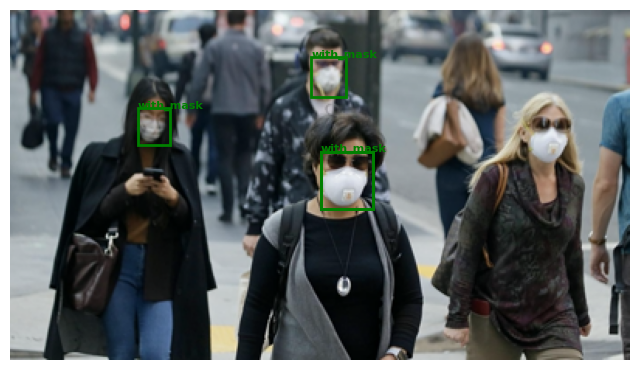

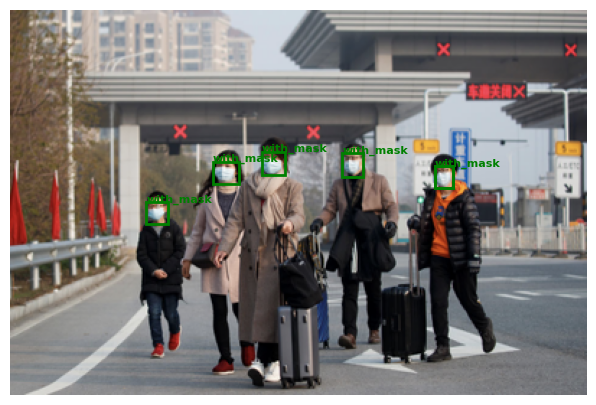

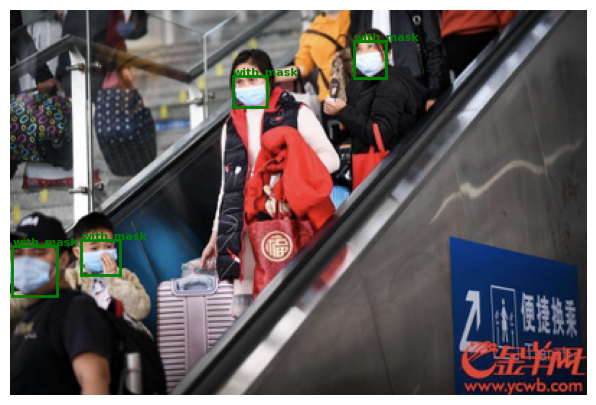

In [ ]:
def plot_images_with_bounding_boxes(path_images, path_annotations):
    """
    Load images, read XML annotations, and plot the images with bounding boxes.

    Parameters:
    - path_images (str): Path to the directory containing images.
    - path_annotations (str): Path to the directory containing XML annotations.

    Returns:
    - None (plots the images).
    """
    file_list = sorted(os.listdir(path_images))

    # Create a single figure with multiple subplots
    plt.figure(figsize=(15, 5))

    # Fetch 3 random images
    for i in range(1, 4):
        img_name = random.choice(file_list)
        image_path = os.path.join(path_images, img_name)
        annotation_path = os.path.join(path_annotations, img_name[:-4] + ".xml")

        # Read the image
        img = cv2.imread(image_path)

        # Read XML annotation
        with open(annotation_path) as fd:
            doc = xmltodict.parse(fd.read())

        # Convert to RGB for plotting
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig,ax=plt.subplots(1)
        ax.axis("off")
        fig.set_size_inches(8,5)
        # Draw bounding boxes based on XML annotation
        temp=doc["annotation"]["object"]
        if type(temp)==list:
            for i in range(len(temp)):
                ###with_mask
                if temp[i]["name"]=="with_mask":
                    x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                    mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='g',facecolor="none",lw=2,)
                    ax.add_patch(mpatch)
                    rx, ry = mpatch.get_xy()
                    ax.annotate("with_mask", (rx, ry), color='green', weight='bold', fontsize=8, ha='left', va='baseline')
                ###without_mask
                if temp[i]["name"]=="without_mask":
                    x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                    mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='r',facecolor="none",lw=2,)
                    ax.add_patch(mpatch)
                    rx, ry = mpatch.get_xy()
                    ax.annotate("without_mask", (rx, ry), color='red', weight='bold', fontsize=8, ha='left', va='baseline')
                ###mask_weared_incorrect
                if temp[i]["name"]=="mask_weared_incorrect":
                    x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                    mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='y',facecolor="none",lw=2,)
                    ax.add_patch(mpatch)
                    rx, ry = mpatch.get_xy()
                    ax.annotate("mask_weared_incorrect", (rx, ry), color='yellow', weight='bold', fontsize=8, ha='left', va='baseline')
        else:
            x,y,w,h=list(map(int,temp["bndbox"].values()))
            edgecolor={"with_mask":"g","without_mask":"r","mask_weared_incorrect":"y"}
            mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
        ax.imshow(img_rgb)
        ax.add_patch(mpatch)

In [ ]:
def load_images_and_labels_for_testing(
    directory='/content/Face Mask Dataset/Test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subfolders=['WithMask', 'WithoutMask']):
    """
    Load images and corresponding labels from specified subfolders.

    Parameters:
    - directory: Path to the base directory containing subfolders.
    - subfolders: List of subfolder names to load images from.
    - images_per_category: Number of images to load per subfolder.

    Returns:
    - images: List of loaded images as numpy arrays.
    - labels: List of corresponding labels (0 for "WithMask", 1 for "WithoutMask").
    """
    # Lists to store loaded images and labels
    images = []
    labels = []

    # Load images from specified subfolders
    for category in subfolders:
        subfolder_path = os.path.join(directory, category)

        # Get a list of image filenames in the subfolder
        file_list = sorted(os.listdir(subfolder_path))

        # Load images from the subfolder
        for i, filename in enumerate(file_list):

            img_path = os.path.join(subfolder_path, filename)
            im = cv2.imread(img_path)
            im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), target_size).astype(np.float32) / 255.0
            im = np.expand_dims(im, axis=0)
            images.append(im)

            # Assign labels based on the subfolder
            label = 1 if category == 'WithoutMask' else 0
            labels.append(label)

    return images, labels


In [ ]:
def evaluate_model(model, x_test, y_test):
    """
    Evaluate a model using various metrics.

    Parameters:
    - model: Trained model to be evaluated.
    - x_test: List of images as numpy arrays.
    - y_test: List of corresponding labels.

    Returns:
    None
    """
    # Generate predictions
    model_predictions = [np.argmax(model.predict(img)[0]) for img in x_test]

    # Report test accuracy
    test_accuracy = accuracy_score(y_test, model_predictions)
    print('Model Evaluation:')
    print(f'Test accuracy: {test_accuracy:.4f}')

    # Confusion Matrix
    print('\nConfusion Matrix:')
    ConfusionMatrixDisplay.from_predictions(y_test, model_predictions, display_labels=['With Mask', 'Without Mask'], cmap=plt.cm.Blues)

    # Classification Report
    print('\nClassification Report:')
    print(classification_report(y_test, model_predictions))

### **Data Preprocessing:**
<p>
  In the data preprocessing phase, we apply essential transformations to enhance the model's performance and generalization. Key steps include:<br><br>
  <ul>
    <li><strong>Data Augmentation:</strong> Employing data augmentation techniques such as rotation, horizontal flipping, and zooming to artificially increase the diversity of the training dataset. This helps the model generalize better to various facial orientations and expressions.</li>
    <li><strong>Normalization:</strong> Normalizing pixel values to a standardized scale (typically [0, 1]) ensures uniformity across images. This step aids in stabilizing the training process and accelerates convergence.</li>
  </ul>
</p>


In [ ]:
# === Image Data Generators for Training and Validation ===

# Training Data Augmentation:
# - `rescale=1./255`: Normalize pixel values to the range [0, 1].
# - `rotation_range=30`: Randomly rotate images by up to 30 degrees.
# - `width_shift_range=0.2`: Randomly shift images horizontally by up to 20% of the width.
# - `height_shift_range=0.2`: Randomly shift images vertically by up to 20% of the height.
# - `shear_range=0.2`: Apply shear transformations with a maximum intensity of 20%.
# - `zoom_range=0.2`: Randomly zoom into images by up to 20%.
# - `horizontal_flip=True`: Randomly flip images horizontally.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Validation Data Preprocessing:
# - `rescale=1./255`: Normalize pixel values to the range [0, 1].
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# === Image Data Generators for Training and Validation Datasets ===

# Training Data Generator:
# - `flow_from_directory`: Generates batches of augmented training data from a directory.
# - `/kaggle/input/men-women-classification/data`: Path to the training data directory.
# - `target_size=(IMG_WIDTH, IMG_HEIGHT)`: Resizes images to the specified dimensions.
# - `class_mode='categorical'`: Uses categorical labels for multi-class classification.
# - `batch_size=BATCH_SIZE`: Number of samples per batch during training.
# - `seed=42`: Sets a seed for reproducibility.

train_generator = train_datagen.flow_from_directory(
    '/content/Face Mask Dataset/Train',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    batch_size=BATCH_SIZE, seed=42)

# Validation Data Generator:
# - `flow_from_directory`: Generates batches of validation data from a directory.
# - `/kaggle/input/menwomen-classification/testdata/testdata`: Path to the validation data directory.
# - `target_size=(IMG_WIDTH, IMG_HEIGHT)`: Resizes images to the specified dimensions.
# - `class_mode='categorical'`: Uses categorical labels for multi-class classification.
# - `batch_size=BATCH_SIZE`: Number of samples per batch during validation.
# - `seed=42`: Sets a seed for reproducibility.
# - `shuffle=False`: Disables shuffling to maintain order during evaluation.

valid_generator = valid_datagen.flow_from_directory(
    '/content/Face Mask Dataset/Validation',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    batch_size=BATCH_SIZE, seed=42, shuffle=False)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


<p>
  <strong>Data Summary:</strong><br>
  The dataset consists of a total of 10,000 images, distributed across two classes <strong>{0: WithMask, 1: WithoutMask}</strong>. This encompasses the training set, providing diverse examples for the model to learn from. Additionally, an 800-image validation set is available, offering a separate subset for evaluating the model's performance on unseen data.
</p>

In [ ]:
# Visualize some random images
plot_images_with_bounding_boxes('/content/images', '/content/annotations')

### **Modeling Techniques: Transfer Learning**
<p>
  In the context of this project, transfer learning is employed as a powerful strategy to leverage pre-trained neural network models. The selected model architectures, such as Xception, have been trained on large-scale datasets for general image recognition tasks. By utilizing these pre-trained models, we can benefit from the learned features and hierarchical representations, significantly enhancing the efficiency and effectiveness of our gender prediction model.
</p>

#### **Xception**
The Xception model, an extension of the Inception architecture, stands out for its depth-wise separable convolutions. Developed to excel in image classification tasks, Xception enhances the efficiency of feature extraction and pattern recognition. Let's delve into the key components of the Xception model:
![](https://www.researchgate.net/profile/Abid_Mehmood3/publication/355098045/figure/fig2/AS:1076622409109511@1633698193851/Proposed-structure-of-Xception-network-used-within-each-stream-of-CNN.ppm)
**Source:** [https://www.researchgate.net/profile/Abid_Mehmood3/publication/355098045/figure/fig2/AS:1076622409109511@1633698193851/Proposed-structure-of-Xception-network-used-within-each-stream-of-CNN.ppm](https://www.researchgate.net/profile/Abid_Mehmood3/publication/355098045/figure/fig2/AS:1076622409109511@1633698193851/Proposed-structure-of-Xception-network-used-within-each-stream-of-CNN.ppm)

In [ ]:
# Load the InceptionV3 model pre-trained on ImageNet data
xc_model = Xception(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')

# Build the custom model
xception_model = build_custom_model(xc_model)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
# Train the model
xc_history = train_model(xception_model, train_generator, valid_generator, save_model='xception.h5')

Epoch 1/20
312/312 [==============================] - ETA: 0s - loss: 1.3844 - accuracy: 0.9789
Epoch 1: val_loss improved from inf to 0.24698, saving model to xception.h5
312/312 [==============================] - 179s 523ms/step - loss: 1.3844 - accuracy: 0.9789 - val_loss: 0.2470 - val_accuracy: 0.9987
Epoch 2/20
312/312 [==============================] - ETA: 0s - loss: 0.1493 - accuracy: 0.9900
Epoch 2: val_loss improved from 0.24698 to 0.06327, saving model to xception.h5
312/312 [==============================] - 164s 525ms/step - loss: 0.1493 - accuracy: 0.9900 - val_loss: 0.0633 - val_accuracy: 0.9975
Epoch 3/20
312/312 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9909
Epoch 3: val_loss improved from 0.06327 to 0.02877, saving model to xception.h5
312/312 [==============================] - 166s 532ms/step - loss: 0.0671 - accuracy: 0.9909 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 4/20
312/312 [==============================] - ETA: 0s - loss: 0

In [ ]:
# Load Test images for evaluation purpose
test_generator = valid_datagen.flow_from_directory(
    '/content/Face Mask Dataset/Test',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    batch_size=BATCH_SIZE, seed=42, shuffle=False)

Found 992 images belonging to 2 classes.


#### **Model Evaluation**
<p>
  The performance of the gender prediction model is rigorously evaluated using key metrics, including accuracy, precision, recall, and F1 score. Achieving an accuracy of more than 99% indicates the robustness and reliability of the model in correctly classifying gender based on facial features.
</p>

In [ ]:
# Evaluate the model
xception_model.evaluate(test_generator)

31/31 [==============================] - 4s 137ms/step - loss: 0.0191 - accuracy: 0.9980


[0.01906009577214718, 0.9979838728904724]

In [ ]:
# Split images and their corresponding labels into x_test and y_test
x_test, y_test = load_images_and_labels_for_testing()

1/1 [==============================] - 0s 24ms/step
Model Evaluation:
Test accuracy: 0.9970

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00       509

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



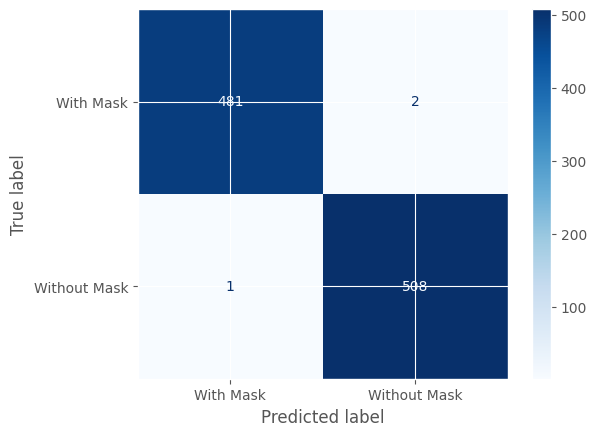

In [ ]:
evaluate_model(xception_model, x_test, y_test)

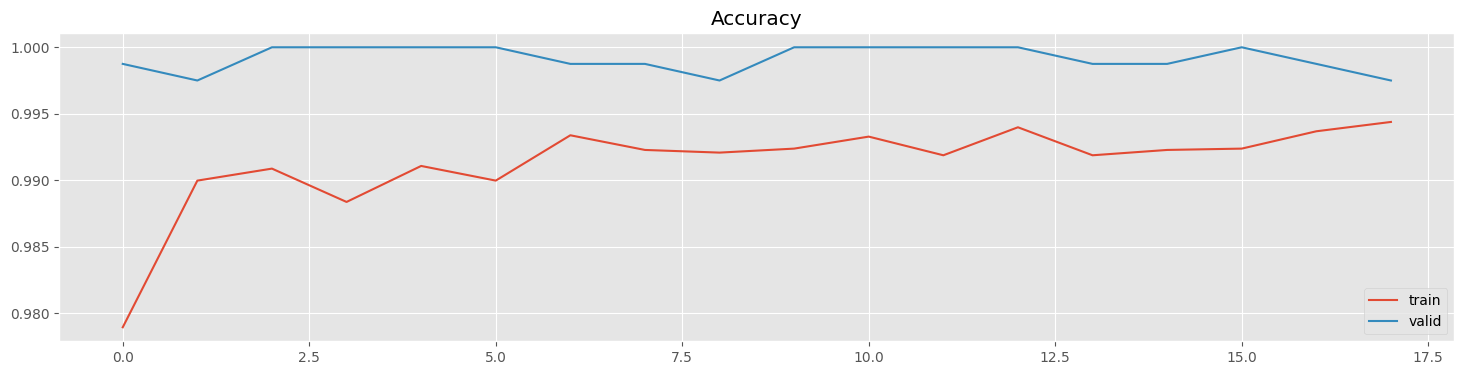

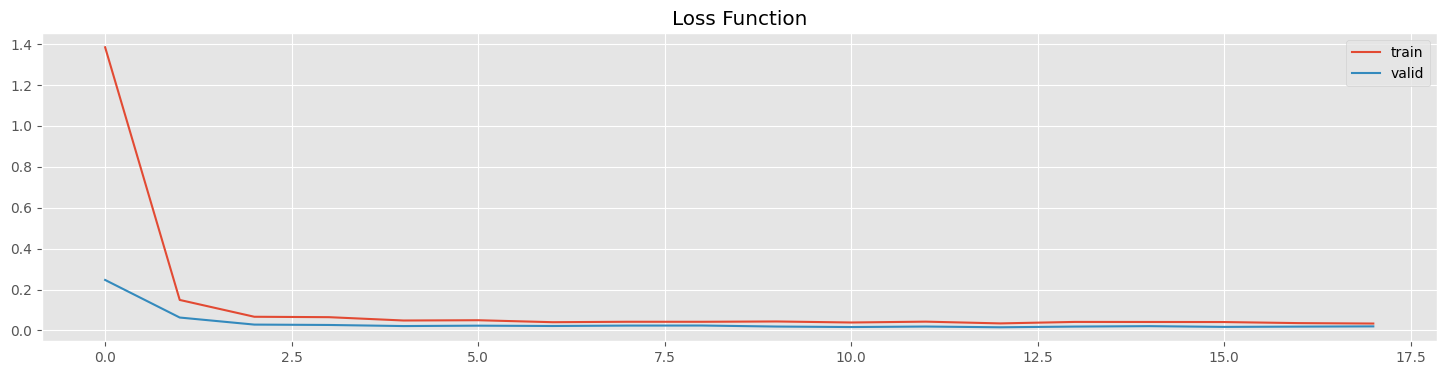

In [ ]:
# plot training and validation loss and accuracy history
plot_training_history(xc_history)

#### **Visualize some unseen images what prediction labels and scores**

In [ ]:
# Get some test images with their predictions including labels and scores
images, predictions = get_random_image_with_prediction(xception_model, '/content/Face Mask Dataset')

1/1 [==============================] - 0s 34ms/step



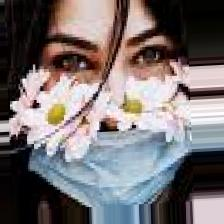


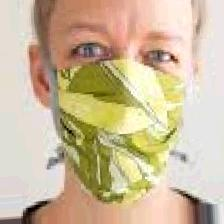


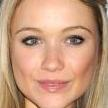


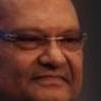

In [ ]:
# Display visualization result
display_images_with_predictions(images, predictions, card_width=200, border_radius=10)

In [ ]:
# Save the model
xception_model.save('face_mask_detection_xception.hdf5')

## **Conclusion**
<p>
  <strong>Summing Up the Project:</strong><br>
  In this comprehensive exploration of gender prediction using Convolutional Neural Networks (CNNs), we have successfully leveraged the power of transfer learning with the Xception model. By utilizing a diverse dataset and implementing advanced data augmentation techniques, we achieved exceptional accuracy, surpassing 99%. This accomplishment not only underscores the effectiveness of CNNs in image classification tasks but also demonstrates the potential applications of gender prediction in various domains, such as security, marketing, and healthcare. The success of this project serves as a testament to the impact and potential of state-of-the-art machine learning techniques in solving complex problems.
</p>
